# VGG16の使い方

- http://blog.outcome.io/pytorch-quick-start-classifying-an-image/
- https://discuss.pytorch.org/t/imagenet-classes/4923
- https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms

import json
import numpy as np
from PIL import Image

- vgg16だけでなく、BatchNormalizationをつけたvgg16_bnもある
- vgg13やvgg19も！

In [3]:
vgg16 = models.vgg16(pretrained=True)

In [4]:
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d (256, 512, kernel_size=(3, 3), 

- 推論するときは model.eval() にすること！

> Some models use modules which have different training and evaluation behavior, such as batch normalization. To switch between these modes, use model.train() or model.eval() as appropriate. See train() or eval() for details.

- 入力画像は特殊な正規化が必要
- ImageNetに合わせる

> All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. You can use the following transform to normalize:

In [5]:
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

In [6]:
img = Image.open('./data/20170104210653.jpg')

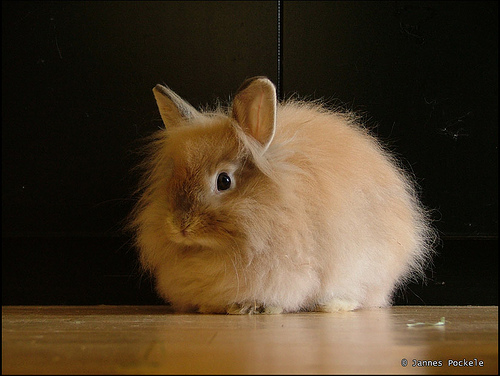

In [7]:
img

In [8]:
img_tensor = preprocess(img)
print(img_tensor.shape)

torch.Size([3, 224, 224])


- Tensorにする前なら画像として表示可能！

<class 'PIL.Image.Image'>


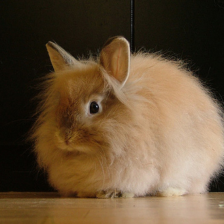

In [9]:
preprocess2 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224)
])
trans_img = preprocess2(img)
print(type(trans_img))
trans_img

- モデルに入力するときはバッチサイズを入れた4Dテンソルにする必要がある
- `unsqueeze_` で可能

In [10]:
img_tensor.unsqueeze_(0)
print(img_tensor.size())

torch.Size([1, 3, 224, 224])


In [11]:
out = vgg16(Variable(img_tensor))

In [12]:
out.size()

torch.Size([1, 1000])

- 出力確率が一番高いインデックスを取得

In [13]:
np.argmax(out.data.numpy())

332

In [14]:
out.topk(5)

(Variable containing:
  28.5678  18.9699  18.1706  16.8523  16.8499
 [torch.FloatTensor of size 1x5], Variable containing:
  332  338  333  283  331
 [torch.LongTensor of size 1x5])

- 332番目が何のクラスか？

In [94]:
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

--2018-02-08 22:29:06--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
s3.amazonaws.com (s3.amazonaws.com) をDNSに問いあわせています... 52.216.81.75
s3.amazonaws.com (s3.amazonaws.com)|52.216.81.75|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 35363 (35K) [application/octet-stream]
`imagenet_class_index.json.1' に保存中

imagenet_class_inde 100%[===================>]  34.53K  98.2KB/s 時間 0.4s       

2018-02-08 22:29:07 (98.2 KB/s) - `imagenet_class_index.json.1' へ保存完了 [35363/35363]



In [95]:
class_index = json.load(open('imagenet_class_index.json', 'r'))

In [96]:
class_index

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [97]:
labels = {int(key):value for (key, value) in class_index.items()}

In [98]:
print(labels[0])
print(labels[1])

['n01440764', 'tench']
['n01443537', 'goldfish']


In [99]:
print(labels[np.argmax(out.data.numpy())])

['n02328150', 'Angora']


- 関数化してみよう

In [100]:
def predict(image_file):
    img = Image.open(image_file)
    img_tensor = preprocess(img)
    img_tensor.unsqueeze_(0)

    out = vgg16(Variable(img_tensor))

    # 出力を確率にする（分類するだけなら不要）
    out = nn.functional.softmax(out, dim=1)
    out = out.data.numpy()

    maxid = np.argmax(out)
    maxprob = np.max(out)
    label = labels[maxid]
    return img, label, maxprob

- `model.eval()` をしないと実行するたびに出力確率が変わる！

['n02328150', 'Angora'] 0.999879


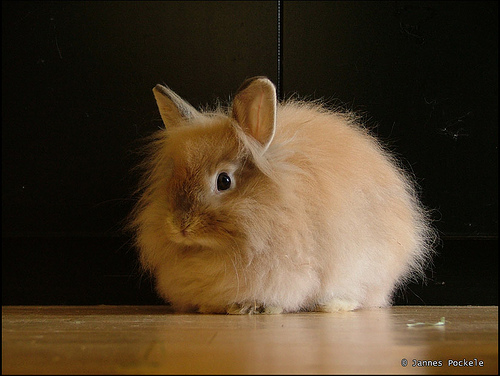

In [108]:
img, label, prob = predict('./data/20170104210653.jpg')
print(label, prob)
img

['n04147183', 'schooner'] 0.942729


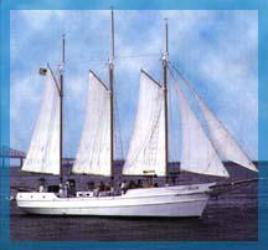

In [109]:
img, label, prob = predict('./data/20170104210658.jpg')
print(label, prob)
img

['n02699494', 'altar'] 0.823404


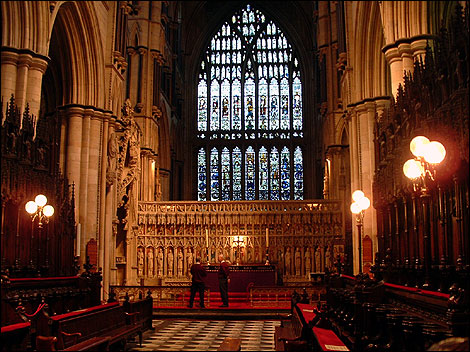

In [110]:
img, label, prob = predict('./data/20170104210705.jpg')
print(label, prob)
img